__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

## Logistic Regression Assumptions

1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from an Israeli banking institutio, and it is related to its retail loans. The classification goal is to predict whether the loan will default (1/0) (variable y)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

The dataset provides the bank loans’ information. It includes 496 records and 10 fields.

In [2]:
data = pd.read_csv("Retail_Loan_Example.csv",encoding='ISO-8859-1')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(469, 10)
['Applicant_ID', 'Age', 'Education_Level', 'Years_with_Current_Employer', 'Years_at_Current_Address', 'Household_Income_(Thousands_NIS)', 'Debt_to_Income_Ratio_(%)', 'Credit_Card_Debt_(Thousands_NIS)', 'Other_Debt_(Thousands_NIS)', 'y']


In [3]:
data.head()

,Applicant_ID,Age,Education_Level,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS),y
0,545710,41,graduate professional education,17,12,661,9.4,43,19,1
1,69664096,27,high school,10,6,116,17.2,5,15,0
2,8965180,40,high school,15,14,207,5.3,3,8,0
3,70572960,41,high school,15,14,451,2.9,10,3,0
4,68589517,24,university,2,0,105,17.1,7,11,1


#### Input variables

1 - Applicant_ID (numeric)

2 - Age: age of loan applicant (numeric)

3 - Education_Level : type of education (categorical: 'graduate professional education', 'high school', 'university')

4 - Years_with_Current_Employer : number of years with the current employer (numeric)

5 - Years_at_Current_Address : number of years at the current address (numeric)

6 - Household_Income_(Thousands_NIS) (numeric)

7 - Debt_to_Income_Ratio_(%) (numeric)

8 - Credit_Card_Debt_(Thousands_NIS) (numeric)

9 - Other_Debt_(Thousands_NIS)


#### Predict variable (desired target):

y - has the loan defaulted? (binary: '1','0')

The Education_Level column of the dataset has many categories. The Education_Level column has the following categories:

In [4]:
data['Education_Level'].unique()

array(['graduate professional education', 'high school', 'university'],
      dtype=object)

In [5]:
data.groupby('Education_Level').mean()

,Applicant_ID,Age,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS),y
Education_Level,,,,,,,,,
graduate professional education,5.502124e+07,36.557377,7.967213,9.459016,244.065574,10.622951,8.540984,18.196721,0.360656
high school,6.262807e+07,34.862454,9.171004,7.855019,143.661710,10.283643,5.319703,9.855019,0.204461
university,6.526780e+07,33.748201,7.546763,8.438849,176.899281,9.945324,5.503597,11.294964,0.294964


After grouping, this is the columns:

# Data exploration

In [6]:
data['y'].value_counts()

0    351
1    118
Name: y, dtype: int64

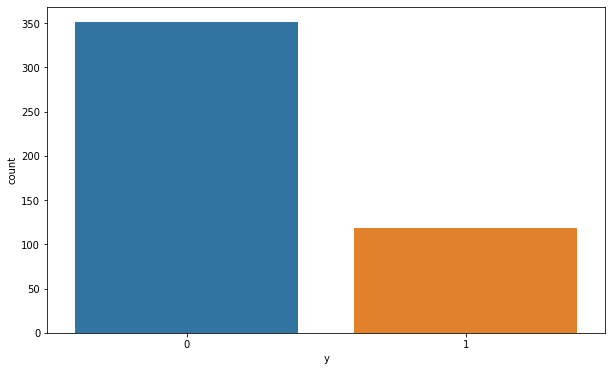

<Figure size 720x432 with 0 Axes>

In [7]:
sns.countplot(x='y', data=data)
plt.show()
plt.savefig('default_count_plot')

In [8]:
count_no_default = len(data[data['y']==0])
count_default = len(data[data['y']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is\033[1m", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default is\033[1m", pct_of_default*100)

 percentage of no default is 74.84008528784648
 percentage of default is 25.15991471215352


Our classes are imbalanced, and the ratio of no-default to default instances is 75:25. Before we go ahead to balance the classes, let’s do some more exploration.

In [9]:
data.groupby('y').mean()

,Applicant_ID,Age,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS)
y,,,,,,,,
0,6.213198e+07,35.219373,9.524217,8.757835,170.324786,8.701994,4.558405,10.028490
1,6.328089e+07,33.364407,5.584746,6.686441,155.406780,14.765254,9.466102,15.347458


Observations:

1. The average age of loan applicants who defaulted on their loans is younger than that of the loan applicants who didn't.

2. The average education level of loan applicants who defaulted on their loans is a bit higher than that of the loan applicants who didn't.

3. The average years with current employer is lower for loan applicants who defaulted on their loans.

4. The average years with current address is lower for loan applicants who defaulted on their loans.

5. The average household income is lower for loan applicants who defaulted on their loans.

6. The average debt to income ratio is lower for loan applicants who defaulted on their loans.

7. The average credit card debt is higher for loan applicants who defaulted on their loans.

8. The average other debt is higher for loan applicants who defaulted on their loans.

We can calculate categorical means for education level status to get a more detailed sense of our data.

In [10]:
data.groupby('Education_Level').mean()

,Applicant_ID,Age,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS),y
Education_Level,,,,,,,,,
graduate professional education,5.502124e+07,36.557377,7.967213,9.459016,244.065574,10.622951,8.540984,18.196721,0.360656
high school,6.262807e+07,34.862454,9.171004,7.855019,143.661710,10.283643,5.319703,9.855019,0.204461
university,6.526780e+07,33.748201,7.546763,8.438849,176.899281,9.945324,5.503597,11.294964,0.294964


# Vizualizations

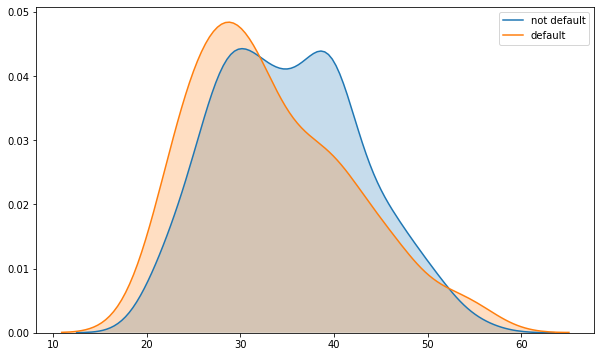

In [11]:
import seaborn as sns
sns.kdeplot(data['Age'].loc[data['y'] == 0], label='not default', shade=True);
sns.kdeplot(data['Age'].loc[data['y'] == 1], label='default', shade=True);

In [12]:
data['Age'].loc[data['y'] == 0].describe()

count    351.000000
mean      35.219373
std        7.631908
min       20.000000
25%       29.000000
50%       35.000000
75%       40.000000
max       56.000000
Name: Age, dtype: float64

In [13]:
data['Age'].loc[data['y'] == 1].describe()

count    118.000000
mean      33.364407
std        8.255188
min       21.000000
25%       27.000000
50%       31.000000
75%       39.000000
max       55.000000
Name: Age, dtype: float64

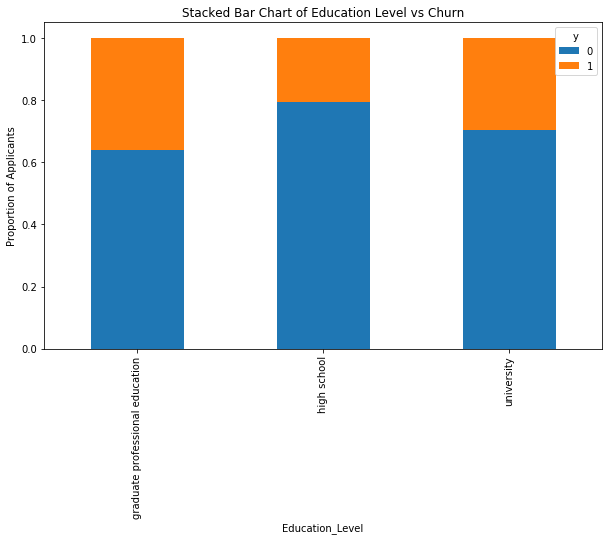

In [14]:
table=pd.crosstab(data.Education_Level,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education Level vs Churn')
plt.xlabel('Education_Level')
plt.ylabel('Proportion of Applicants')
plt.savefig('Education_Level_vs_pur_stack')

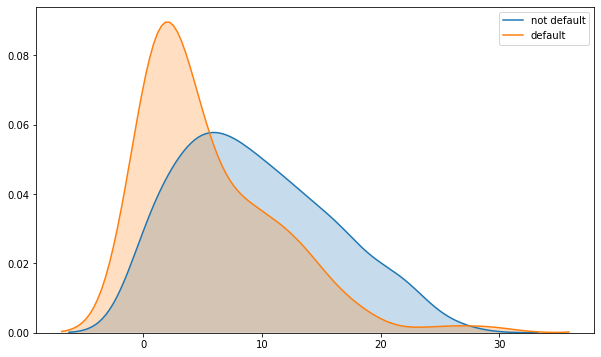

In [15]:
sns.kdeplot(data['Years_with_Current_Employer'].loc[data['y'] == 0], label='not default', shade=True);
sns.kdeplot(data['Years_with_Current_Employer'].loc[data['y'] == 1], label='default', shade=True);

In [16]:
data['Years_with_Current_Employer'].loc[data['y'] == 0].describe()

count    351.000000
mean       9.524217
std        6.375297
min        0.000000
25%        4.000000
50%        9.000000
75%       14.000000
max       27.000000
Name: Years_with_Current_Employer, dtype: float64

In [17]:
data['Years_with_Current_Employer'].loc[data['y'] == 1].describe()

count    118.000000
mean       5.584746
std        5.630087
min        0.000000
25%        1.250000
50%        4.000000
75%        9.000000
max       29.000000
Name: Years_with_Current_Employer, dtype: float64

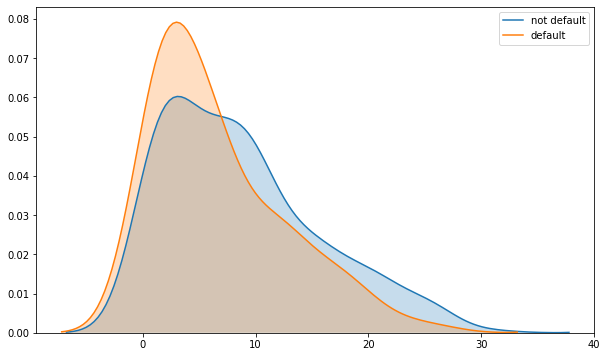

In [18]:
sns.kdeplot(data['Years_at_Current_Address'].loc[data['y'] == 0], label='not default', shade=True);
sns.kdeplot(data['Years_at_Current_Address'].loc[data['y'] == 1], label='default', shade=True);

In [19]:
data['Years_at_Current_Address'].loc[data['y'] == 0].describe()

count    351.000000
mean       8.757835
std        6.875716
min        0.000000
25%        3.000000
50%        8.000000
75%       13.000000
max       31.000000
Name: Years_at_Current_Address, dtype: float64

In [20]:
data['Years_at_Current_Address'].loc[data['y'] == 1].describe()

count    118.000000
mean       6.686441
std        5.872868
min        0.000000
25%        2.000000
50%        5.000000
75%       11.000000
max       26.000000
Name: Years_at_Current_Address, dtype: float64

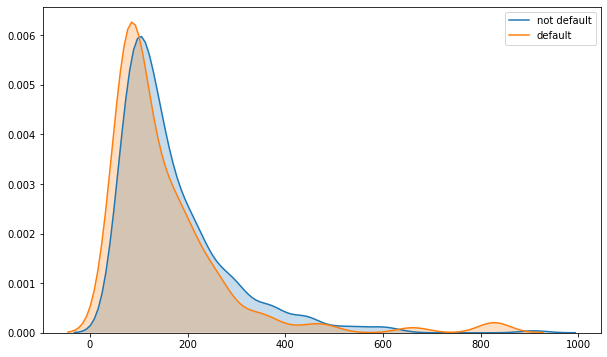

In [21]:
sns.kdeplot(data['Household_Income_(Thousands_NIS)'].loc[data['y'] == 0], label='not default', shade=True);
sns.kdeplot(data['Household_Income_(Thousands_NIS)'].loc[data['y'] == 1], label='default', shade=True);

In [22]:
data['Household_Income_(Thousands_NIS)'].loc[data['y'] == 0].describe()

count    351.000000
mean     170.324786
std      111.494663
min       53.000000
25%       94.000000
50%      135.000000
75%      210.000000
max      909.000000
Name: Household_Income_(Thousands_NIS), dtype: float64

In [23]:
data['Household_Income_(Thousands_NIS)'].loc[data['y'] == 1].describe()

count    118.000000
mean     155.406780
std      131.632241
min       53.000000
25%       79.000000
50%      105.000000
75%      187.000000
max      830.000000
Name: Household_Income_(Thousands_NIS), dtype: float64

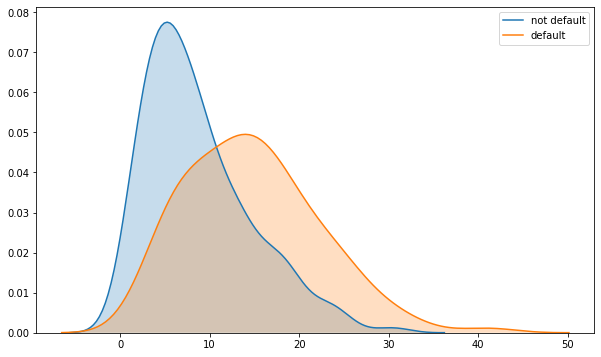

In [24]:
sns.kdeplot(data['Debt_to_Income_Ratio_(%)'].loc[data['y'] == 0], label='not default', shade=True);
sns.kdeplot(data['Debt_to_Income_Ratio_(%)'].loc[data['y'] == 1], label='default', shade=True);

In [25]:
data['Debt_to_Income_Ratio_(%)'].loc[data['y'] == 0].describe()

count    351.000000
mean       8.701994
std        5.899179
min        0.000000
25%        4.350000
50%        7.300000
75%       12.050000
max       30.600000
Name: Debt_to_Income_Ratio_(%), dtype: float64

In [26]:
data['Debt_to_Income_Ratio_(%)'].loc[data['y'] == 1].describe()

count    118.000000
mean      14.765254
std        7.380494
min        2.500000
25%        8.975000
50%       14.100000
75%       19.250000
max       41.100000
Name: Debt_to_Income_Ratio_(%), dtype: float64

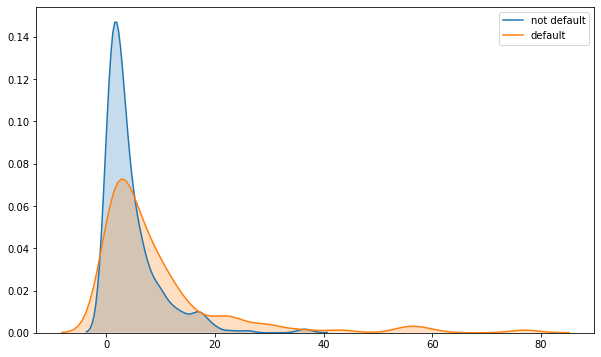

In [27]:
sns.kdeplot(data['Credit_Card_Debt_(Thousands_NIS)'].loc[data['y'] == 0], label='not default', shade=True);
sns.kdeplot(data['Credit_Card_Debt_(Thousands_NIS)'].loc[data['y'] == 1], label='default', shade=True);

In [28]:
data['Credit_Card_Debt_(Thousands_NIS)'].loc[data['y'] == 0].describe()

count    351.000000
mean       4.558405
std        5.155456
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       37.000000
Name: Credit_Card_Debt_(Thousands_NIS), dtype: float64

In [29]:
data['Credit_Card_Debt_(Thousands_NIS)'].loc[data['y'] == 1].describe()

count    118.000000
mean       9.466102
std       12.764589
min        0.000000
25%        2.000000
50%        5.000000
75%       11.000000
max       77.000000
Name: Credit_Card_Debt_(Thousands_NIS), dtype: float64

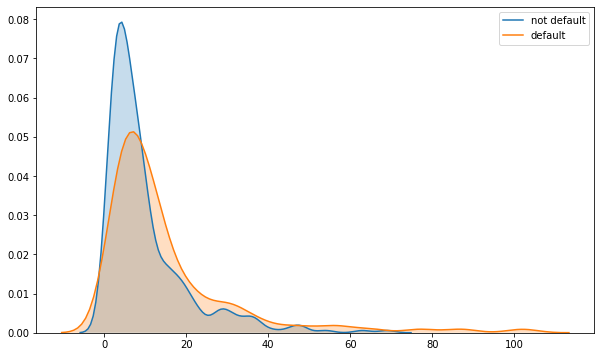

In [30]:
sns.kdeplot(data['Other_Debt_(Thousands_NIS)'].loc[data['y'] == 0], label='not default', shade=True);
sns.kdeplot(data['Other_Debt_(Thousands_NIS)'].loc[data['y'] == 1], label='default', shade=True);

In [31]:
data['Other_Debt_(Thousands_NIS)'].loc[data['y'] == 0].describe()

count    351.000000
mean      10.028490
std       10.330774
min        0.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       69.000000
Name: Other_Debt_(Thousands_NIS), dtype: float64

In [32]:
data['Other_Debt_(Thousands_NIS)'].loc[data['y'] == 1].describe()

count    118.000000
mean      15.347458
std       17.155586
min        1.000000
25%        5.250000
50%       10.000000
75%       17.750000
max      102.000000
Name: Other_Debt_(Thousands_NIS), dtype: float64

# Create dummy variables

That is variables with only two values, zero and one.

In [33]:
cat_vars=['Education_Level']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Education_Level']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Our final data columns will be:

In [34]:
data_final=data[to_keep]
data_final.columns.values

array(['Applicant_ID', 'Age', 'Years_with_Current_Employer',
       'Years_at_Current_Address', 'Household_Income_(Thousands_NIS)',
       'Debt_to_Income_Ratio_(%)', 'Credit_Card_Debt_(Thousands_NIS)',
       'Other_Debt_(Thousands_NIS)', 'y',
       'Education_Level_graduate professional education',
       'Education_Level_high school', 'Education_Level_university'],
      dtype=object)

In [35]:
data_final.drop(['Applicant_ID'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the __SMOTE algorithm__ (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.

2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [36]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is" ,len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

 length of oversampled data is 502
 Number of no default in oversampled data 251
 Number of default 251
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

__Recursive Feature Elimination (RFE)__ is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [37]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The RFE has helped us select the following features: 'Age', 'Years_with_Current_Employer', 'Years_at_Current_Address','Household_Income_(Thousands_NIS)', 'Debt_to_Income_Ratio_(%)','Credit_Card_Debt_(Thousands_NIS)', 'Other_Debt_(Thousands_NIS)','Education_Level_graduate professional education','Education_Level_high school', 'Education_Level_university'.

In [38]:
cols=['Age', 'Years_with_Current_Employer', 'Years_at_Current_Address','Household_Income_(Thousands_NIS)',
      'Debt_to_Income_Ratio_(%)','Credit_Card_Debt_(Thousands_NIS)', 'Other_Debt_(Thousands_NIS)',
      'Education_Level_graduate professional education','Education_Level_high school', 'Education_Level_university'] 
X=os_data_X[cols]
y=os_data_y['y']

# Gradient Boosting Classifier Model Fitting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Predicting the test set results and calculating the accuracy

In [40]:
y_pred = gb.predict(X_test)
print("\033[1m Accuracy of gradient boosting classifier on test set:", '{:.2f}'.format(gb.score(X_test, y_test)))

 Accuracy of gradient boosting classifier on test set: 0.85


# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[53 14]
 [ 8 76]]


In [42]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  129 correct predictions
 The result is telling us that we have:  22 incorrect predictions
 We have a total predictions of:  151


# Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        67
           1       0.84      0.90      0.87        84

    accuracy                           0.85       151
   macro avg       0.86      0.85      0.85       151
weighted avg       0.86      0.85      0.85       151



In [44]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of gradient boosting classifier:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of gradient boosting classifier:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our gradient\nboosting classifier predicted a loan is going to default, that loan actually defaulted","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of gradient boosting classifier:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a loan who defaulted the company present in the test set, our gradient boosting classifier\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of gradient boosting classifier: 85.43%
Well, you got a classification rate of 85.43%

Precision of gradient boosting classifier: 84.44%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our gradient
boosting classifier predicted a loan is going to default, that loan actually defaulted 84.44% of
 the time.

Recall of gradient boosting classifier: 90.48%
Recall: If there is a loan who defaulted the company present in the test set, our gradient boosting classifier
can identify it 90.48% of the time.


# ROC Curve

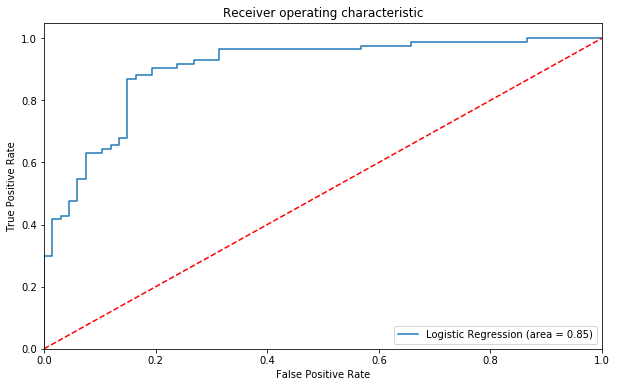

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Real-time Prediction

In [46]:
data['PD'] = gb.predict_proba(data[X_train.columns])[:,1]
data[['Applicant_ID','PD']].head(10)

,Applicant_ID,PD
0,545710,0.802758
1,69664096,0.148350
2,8965180,0.024139
3,70572960,0.067681
4,68589517,0.624818
5,107370446,0.037553
6,114228157,0.696750
7,35511139,0.012381
8,91060858,0.958422
9,1454308,0.868812
